## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

import numpy as np ; na = np.newaxis
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from cleverhans.plot.pyplot_image import grid_visual
from FEA import FeatureEnhancementAttack
from art.utils import load_dataset

Using TensorFlow backend.


## Data

In [3]:
(x_train, y_train), (x_test, y_test), _, _ = load_dataset(str('mnist'))

x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant', constant_values=(0.,))
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant', constant_values=(0.,))
x_train = x_train * 2 - 1; x_test = x_test * 2 - 1

# m = [3, 2, 1, 18, 4, 8, 11, 0, 61, 7]
m = range(100)
X = x_test[m, ...]
Y = y_test[m, :]
(img_rows, img_cols, nchannels) = X.shape[1:4]

## Model

In [4]:
model = Sequential()

model.add(Conv2D(10, (5, 5), activation='relu', input_shape=X.shape[1:4]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)
scores = model.evaluate(x_test, y_test)
print("Scores on test set: loss=%s accuracy=%s" % tuple(scores))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2652 - acc: 0.9251
Epoch 2/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0585 - acc: 0.9819
Epoch 3/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0406 - acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0312 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0240 - acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0204 - acc: 0.9935
Epoch 7/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0168 - acc: 0.9945
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0135 - acc: 0.9957
Epoch 9/10
60000/60000 [==============================] - 111s 2ms/step 

## Nontargeted attack

Waiting...
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
100/100 [==============================] - 0s 740us/step

FEA-I test accuracy: 0.00%


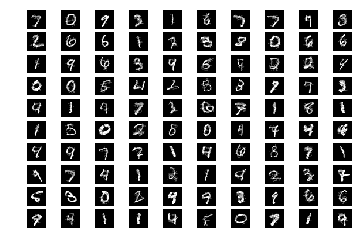

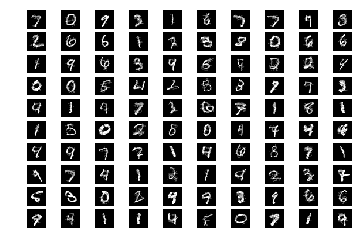

In [5]:
FEA_I = FeatureEnhancementAttack(model, X, targeted=False, rule='iter',eps=0.1, n=20)
(_, acc) = model.evaluate(FEA_I, Y)
print("\nFEA-I test accuracy: %.2f%%" % (acc * 100))

grid_visual(np.reshape(FEA_I, (10, np.size(m) // 10, img_rows, img_cols, nchannels)))

Waiting...
100/100 [==============================] - 0s 630us/step

FEA-F test accuracy: 0.00%


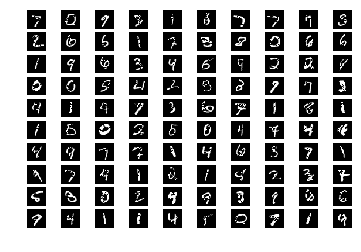

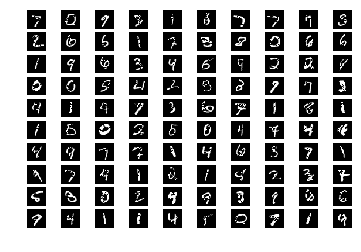

In [6]:
FEA_F = FeatureEnhancementAttack(model, X, targeted=False, rule='flip')
(_, acc) = model.evaluate(FEA_F, Y)
print("\nFEA-F test accuracy: %.2f%%" % (acc * 100))

grid_visual(np.reshape(FEA_F, (10, np.size(m) // 10, img_rows, img_cols, nchannels)))

## Targeted attack

In [7]:
m = [3, 2, 1, 18, 4, 8, 11, 0, 61, 7]
X = X[m, ...]
Y = Y[m, :]

Waiting...


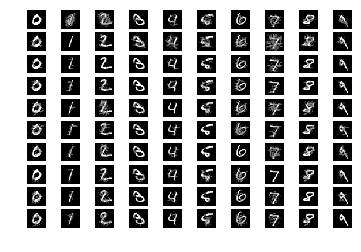

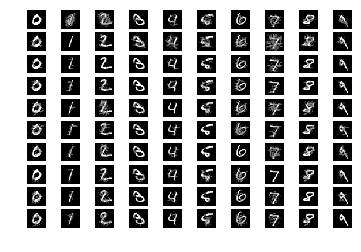

In [8]:
FEA_I = FeatureEnhancementAttack(model, X, targeted=True, eps=0.1, n=20)
grid_visual(FEA_I)

Waiting...


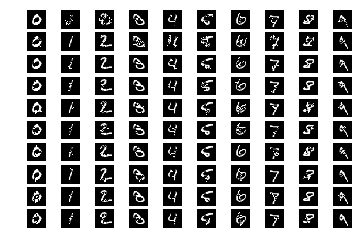

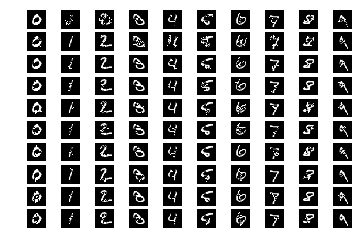

In [9]:
FEA_F = FeatureEnhancementAttack(model, X, targeted=True, rule='flip')
grid_visual(FEA_F)